# Tarea 1
Alumno: **Luis Fernando Izquierdo Berdugo**

Materia: **Matemáticas para la Ciencia de Datos**

Profesora: **Briceyda B. Delgado**

Durante los últimos 65 años, la población en México ha crecido poco más de cuatro veces. En 1950 había 25.8 millones de personas y en 2015 la población llegó a 119.5 millones.
La tabla siguiente muestra la población de nuestro país en el período de 1950 a 2015 de acuerdo al Instituto Nacional de Estadística y Geografía (INEGI).

|Año|1950|1960|1970|1980|1990|2000|2010|2015|
|---|----|----|----|----|----|----|----|----|
|Poblacion|25.8|34.9|48.2|66.8|81.2|97.5|112.3|119.5|

### Actividades a realizar
1. Establecer un modelo de crecimiento poblacional basado en el Modelo Logístico utilizando los datos de 3 distintos años de la tabla.
2. Crear una tabla para comparar la población real con los valores pronosticados por el modelo.
3. Calcular el porcentaje de error para cada par de datos.
4. Dar una conclusión acerca del modelo propuesto y su efectividad.


## Inciso 1 - Establecer un modelo de crecimiento poblacional basado en el Modelo Logístico utilizando los datos de 3 distintos años de la tabla.
Primero se analizará el modelo logístico visto en clase:

### $\frac{dP}{dt} = kP(1-\frac{P}{K})$

- `P(t)` representa la cantidad de población o la variable de interés en el tiempo t,
- `K` se le conoce como la barrera poblacional o capacidad de carga, es decir, es la máxima población sostenida por el ambiente,
- `k` es la tasa de crecimiento y representa la tasa intrínseca de crecimiento de la población cuando la población es pequeña y no hay limitaciones de recursos.

Integrando por fracciones parciales, obtenemos:

### $P(t) = \frac{K}{1+Ce^{-kt}}$

Para ejecutar este modelo en Python, primero vamos a importar datos, para crear el modelo de crecimiento, se escogieron los datos de los años 1950, 1970 y 2010, sin embargo, se usarán los datos con relación a nuestra fecha inicial, por lo que se le restará 1950 quedando 0, 20 y 60 respectivamente.
|Año|1950|1960|1970|1980|1990|2000|2010|2015|
|---|----|----|----|----|----|----|----|----|
|Año|0|10|20|30|40|50|60|65|
|Poblacion|25.8|34.9|48.2|66.8|81.2|97.5|112.3|119.5|

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = {'fecha': [0, 20, 60], #Se usa la fecha en relación a nuestra inicial, siendo 1950 el valor que se les restará
        'poblacion': [25.8, 48.2, 112.3]}

df = pd.DataFrame(data)
df

,fecha,poblacion
0,0,25.8
1,20,48.2
2,60,112.3


A continuación, se hará la definición de la función logística, cambiaremos la variable k (minúscula) por la variable r, esta tendrá la misma función y solamente se cambiará la representación para evitar problemas al ejecutar correctamente el código.

### $P(t) = \frac{K}{1 + Ce^{-rt}}$




In [25]:
def funcion_logistica(t, K, r, C):
  """
  Parametros:
    t: tiempo (años)
    K: barrera poblacional
    r: tasa de crecimiento
    C = Constante
  """
  return K / ( 1 + C * (np.exp(-(r*t))) )

Lo siguiente será crear una función para encontrar los valores óptimos de los parámetros del modelo ($K$, $r$ y $C$).

Esta función tomará de entrada el dataframe creado con los datos y los dividirá en fecha y población en xdata e ydata respectivamente.

Lo siguiente sería establecer valores iniciales de $K$, $r$ y $C$ como una estimación inicial, para posteriormente usar la función curve_fit de scipy que realiza el ajuste no lineal, esta función compara las predicciones del modelo logístico con los datos reales y ajusta los parámetros para que se minimice el error. Esto devolvera los parametros optimizados.

In [28]:
def optimizar_valores(df):

  xdata = df['fecha']
  ydata = df['poblacion']

  p0 = [148, 0.5, 15] #Estimación inicial

  p_opt, pcov = curve_fit(funcion_logistica, xdata, ydata, p0=p0)

  return p_opt

# Fit the model
params = optimizar_valores(df)
K, r, C = params
print(K)
print(r)
print(C)

170.82067130358317
0.039638260255862166
5.6209562520768666


/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_980/3263534148.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  p_opt, pcov = curve_fit(funcion_logistica, xdata, ydata, p0=p0)


Sustituyendo los datos obtenidos en el modelo inicial, queda:

### $P(t) = \frac{170.82}{1 + 5.62e^{-0.0396t}}$

Si evaluamos para varios casos, obtenemos:

In [31]:
test = funcion_logistica(0, *params)
print("Poblacion en 1950: %s" % test)

test = funcion_logistica(40, *params)
print("Poblacion en 1990: %s" % test)

test = funcion_logistica(60, *params)
print("Poblacion en 2010: %s" % test)

test = funcion_logistica(65, *params)
print("Poblacion en 2015: %s" % test)



Poblacion en 1950: 25.8
Poblacion en 1990: 79.40007890581565
Poblacion en 2010: 112.30000000000003
Poblacion en 2015: 119.6708162078329


Se grafica el modelo:

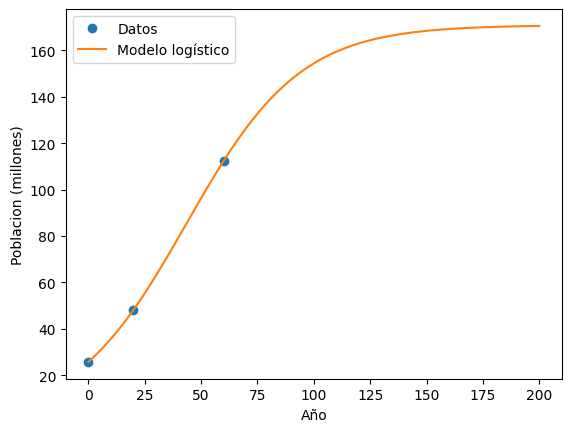

In [34]:
def graficar_modelo(df, params):

  xdata = df['fecha']
  ydata = df['poblacion']

  t = np.linspace(xdata.min(), (200), 100)
  y_pred = funcion_logistica(t, *params)

  plt.plot(xdata, ydata, 'o', label='Datos')
  plt.plot(t, y_pred, '-', label='Modelo logístico')
  plt.xlabel('Año')
  plt.ylabel('Poblacion (millones)')
  plt.legend()
  plt.show()

graficar_modelo(df, params)


## Inciso 2 - Crear una tabla para comparar la población real con los valores pronosticados por el modelo.

Primero se crearan los datos y se crearan en un nuevo Dataframe de pandas.

In [35]:
data_modelo = {'fecha': [0,10,20,30,40,50,60,65],
        'poblacion': [funcion_logistica(0, *params),funcion_logistica(10, *params),funcion_logistica(20, *params),
                      funcion_logistica(30, *params),funcion_logistica(40, *params),funcion_logistica(50, *params),
                      funcion_logistica(60, *params),funcion_logistica(65, *params)]}

df_modelo = pd.DataFrame(data_modelo)
df_modelo

,fecha,poblacion
0,0,25.800000
1,10,35.725375
2,20,48.200000
3,30,62.999232
4,40,79.400079
5,50,96.258803
6,60,112.300000
7,65,119.670816


Con esta información ya podemos hacer la comparación entre los datos obtenidos y los reales.
|Año|1950|1960|1970|1980|1990|2000|2010|2015|
|---|----|----|----|----|----|----|----|----|
|Poblacion real|25.8|34.9|48.2|66.8|81.2|97.5|112.3|119.5|
|Poblacion modelo|25.8|35.7253|48.2|62.9992|79.4|96.2588|112.3|119.6708|

### Inciso 3 - Calcular el porcentaje de error para cada par de datos.

Para calcular el porcentaje, se usará la siguiente fórmula:

### $Error = |\frac{V_{real} - V_{predicho}}{V_{real}}|*100$

Entonces, para cada par de datos tenemos:

|Año|1950|1960|1970|1980|1990|2000|2010|2015|
|---|----|----|----|----|----|----|----|----|
|Poblacion real|25.8|34.9|48.2|66.8|81.2|97.5|112.3|119.5|
|Poblacion modelo|25.8|35.7253|48.2|62.9992|79.4|96.2588|112.3|119.6708|
|Porcentaje de Error|0%|2.36%|0%|5.69%|2.21%|1.27%|0%|0.1429%|

## Inciso 4 - Dar una conclusión acerca del modelo propuesto y su efectividad.

### $P(t) = \frac{170.82}{1 + 5.62e^{-0.0396t}}$

De manera general, el modelo logístico propuesto funciona satisfactoriamente con un error promedio de 1.46%, teniendo su máximo en 1980 con 5.69%, que podría causarse por los datos que se tomaron de manera inicial. Ya que al optimizar los datos calculados de $K$, $k$ y $P_0$

Como se observó en la gráfica del modelo (final del inciso 1), se puede ver que el modelo está optimizado para los datos iniciales, pasando correctamente por estos tres puntos, sin embargo, analizando la gráfica podemos ver que podría ser más preciso en los distintos años que tenemos de información real.

Se esperaría que conforme se alimente el modelo con más datos para calcular la barrera poblacional y la tasa de crecimiento, el modelo se vuelva más preciso y se acerquen mucho más los datos a los reales, siendo el error mínimo.

Sería de interés elaborar un modelo que pueda tener en cuentas diferentes factores externos que podrían suceder, como desastres naturales, enfermedades, etc.